In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display, Markdown
from math import pi
import seaborn as sns
from nba_api.stats.endpoints import playercareerstats 
from nba_api.stats.static import players


In [5]:
df = pd.read_csv('bubble_stats.csv')
df.head(20)

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,...,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,...,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,...,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,...,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,...,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,...,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4
5,Deng Adel,79,200,NaN,21,-,1.7,0.2,0.1,0.3,...,10.2,19,2.7,-0.2,0.0,-0.2,-0.054,9.9,-7.3,-0.3
6,LaMarcus Aldridge,83,260,San Antonio Spurs,33,22347015,21.3,1.3,0.5,2.4,...,33.2,81,22.9,6.4,2.9,9.3,0.167,26.9,1.6,2.5
7,Rawle Alkins,77,225,NaN,21,-,3.7,0.0,0.1,1.3,...,12.0,10,8.1,-0.1,0.0,-0.1,-0.042,19.0,-6.5,-0.1
8,Grayson Allen,77,198,Utah Jazz,23,2074320,5.6,0.2,0.2,0.7,...,10.9,38,7.5,-0.4,0.4,0.0,0.002,24.4,-6.8,-0.5
9,Jarrett Allen,83,237,Brooklyn Nets,20,2034120,10.9,1.5,0.5,1.4,...,26.2,80,18.5,4.4,3.3,7.6,0.175,15.9,2.5,2.4


In [12]:
labels=np.array(['PER','OWS','DWS', 'WS','BPM','VORP'])
player1 = 3
player2 = 6
player1name = df.loc[player1,'Name']
player2name = df.loc[player2,'Name']
stats1=df.loc[player1,labels].values
stats2=df.loc[player2,labels].values

In [13]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats1=np.concatenate((stats1,[stats1[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
angles=np.concatenate((angles,[angles[0]]))

#### Stats comparison between Steven Adams and LaMarcus Aldridge

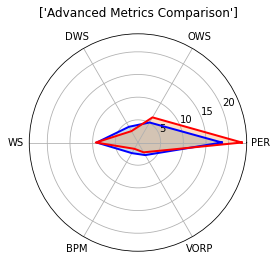

In [14]:
display(Markdown(f'#### Stats comparison between {player1name} and {player2name}'))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats1, 'b-', linewidth=2)
ax.plot(angles, stats2, 'r-', linewidth=2)
ax.fill(angles, stats1, alpha=0.25)
ax.fill(angles, stats2, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.legend
ax.set_title(['Advanced Metrics Comparison'])
ax.grid(True)